In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as scc

np.random.seed(9725) # Set random seed for reproducibility
%matplotlib inline

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

#### useful formulas:
* $t_{1/2} = \frac{\ln(2)}{\lambda}$

* $\tau = \frac{1}{\lambda}$

where

* t1/2 is the half-life in seconds
* ln(2) is the natural logarithm of 2 (approximately 0.693)
* λ is the decay constant in seconds
* τ is the mean lifetime in seconds

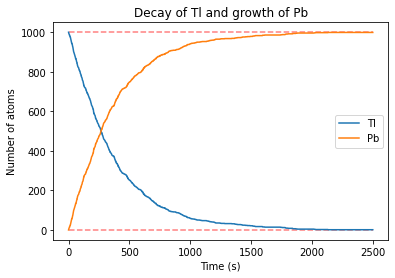

This script simulates the decay of Thallium atoms into Lead atoms over time.
It uses a binomial distribution to determine the number of atoms that decay at each time step,
based on the decay probability.


In [2]:
# Constants
half_life = 3.052 * 60  # Convert minutes to seconds
tau = half_life / np.log(2)
time_steps = 2500 # Total simulation time in seconds
Tl_in = 1000  # Initial number of Tl atoms

# Arrays to hold the number of atoms
Tl = np.zeros(time_steps)
Pb = np.zeros(time_steps)
Tl[0] = Tl_in

# Main simulation loop
for t in range(1, time_steps):
    # Calculate the probability of decay for each atom
    p = 1 - 2**(-1/tau)
    
    # Determine how many atoms decay
    decays = np.random.binomial(Tl[t-1], p)
    
    # Update the number of atoms
    Tl[t] = Tl[t-1] - decays
    Pb[t] = Pb[t-1] + decays

# Plot the results
plt.plot(Tl, label='Tl')
plt.plot(Pb, label='Pb')
plt.hlines(Tl_in, 0 , time_steps, linestyles='dashed', color='red', alpha=0.5)
plt.hlines(0, 0, time_steps, linestyles='dashed', color='red', alpha=0.5)
plt.title('Decay of Tl and growth of Pb')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.show()

print('This script simulates the decay of Thallium atoms into Lead atoms over time.')
print('It uses a binomial distribution to determine the number of atoms that decay at each time step,')
print('based on the decay probability.')

* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

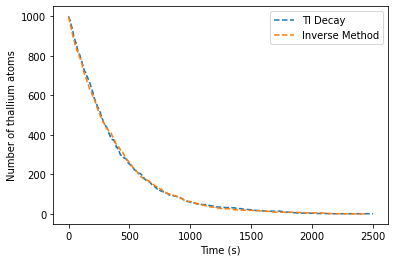

In [3]:
#Inverse cumulative distribution
def icdf(z):
    return (-tau) * np.log2(1 - z)

#Inizialize the list containing the t values
times = []

for atom in range(0, 1000):
    t = icdf(np.random.uniform(0, 1))   #Random generation of z with np.random.uniform(0,1)
    times.append(t)                     #Saving t value to the list
    
times = np.sort(np.array(times))        #Sorting t values...
times = times[::-1]                     #...in descending order (recall that thallium atoms decrease over time)

#Plot
plt.plot(Tl, linestyle='dashed', label='Tl Decay')
plt.plot(times, range(0, 1000), linestyle='dashed', label='Inverse Method')
plt.xlabel('Time (s)')
plt.ylabel('Number of thallium atoms')
plt.legend()
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [4]:
# costants
Z = 79
e = scc.elementary_charge
epsilon0 = scc.epsilon_0
E = 7.7 * abs(e) * 10**(6)   #Converting it to joules

# define the beam as a 2d gaussian distribution
a0 = scc.physical_constants['Bohr radius'][0]
N = int(1e6)
sigma = a0 / 100

x = np.random.normal(0, sigma, N)
y = np.random.normal(0, sigma, N)
b = np.sqrt(x**2 + y**2)

In [5]:
#Counting how many particles are bounced back
backscattering = np.sum(np.arctan((Z * e**2) / (2 * np.pi * epsilon0 * E * b)) * 2 > np.pi / 2)

print(f"The particles that are bounced back are {backscattering} over {N}: {backscattering / N * 100:.2f}%")

The particles that are bounced back are 1593 over 1000000: 0.16%


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [6]:
# define the function
def f(x):
    return np.power(np.sin(np.power(x*(x-2), -1)), 2)

# number of samples
n_shots = int(1e6)

# generating samples inside a rectangle 
x_dim = np.random.uniform(low=0.0, high=2.0, size=n_shots)
y_dim = np.random.uniform(low=0.0, high=1.0, size=n_shots)

# function values
f_values = f(x_dim)

# Hit/Miss Method
hm_integral = 2 * np.sum(f_values > y_dim) / n_shots # rectangle area: 2*1=2
print(f'Integral: {hm_integral} Hit/Miss Method')
#error_hit_miss = area_rect * np.std(f_vals > y_samples) / np.sqrt(N_shots)
#print('Error Estimate for Hit/Miss Method:', error_hit_miss)

# Mean Value Method
mv_integral = 2 * np.mean(f_values) # 2-0=2
print(f'Integral: {mv_integral} Mean Value Method')
#error_mean_value = 2 * np.std(f_vals) / np.sqrt(N_shots)
#print('Error Estimate for Mean Value Method:', error_mean_value)

Integral: 1.451884 Hit/Miss Method
Integral: 1.4516509295042048 Mean Value Method


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [7]:
# number of shots
n_shots = int(1e6)

# 2D unit radius circle
print('2D:')

# generating samples
x_dim = np.random.uniform(low=-1.0, high=1.0, size=n_shots)
y_dim = np.random.uniform(low=-1.0, high=1.0, size=n_shots)

# calculateing the distance of each sample from the center
r_square_2d = np.power(x_dim, 2) + np.power(y_dim, 2)

# Monte Carlo Algorithm
circle_area_2d = 4 * np.sum(r_square_2d < 1) / n_shots # square area = 2*2 = 4
print('Area of the unit circle with Monte Carlo:', circle_area_2d)
print('Analytic result:', np.pi)
print()

# 10D unit radius circle
print('10D:')

# generating samples
samples_list = [np.random.uniform(low=-1.0, high=1.0, size=n_shots) for _ in range(10)]

#calculating the distance of each sample from the center
r_square_10d = np.sum(np.square(np.stack(samples_list, axis=1)), axis=1)

# Monte Carlo Algorithm
circle_area_10d = 2**10 * np.sum(r_square_10d < 1) / n_shots
print('Area of the unit 10D sphere with Monte Carlo:', circle_area_10d)
print('Analytic result:', np.power(np.pi, 5) / 120)

2D:
Area of the unit circle with Monte Carlo: 3.140376
Analytic result: 3.141592653589793

10D:
Area of the unit 10D sphere with Monte Carlo: 2.460672
Analytic result: 2.550164039877345


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [8]:
# Define the integrand and weight functions
def f(x):
    return np.power(x, -0.5) / (np.exp(x) + 1)

def w(x):
    return np.power(x, -1/2)

# Define the number of samples
N_shots = int(1e6)

# Define the domain for x
#x_dom = np.linspace(1e-10, 1., num=N_shots)
x_dom = np.random.uniform(low=0, high=1, size=N_shots)

# Compute the probabilities for each x based on the weight function
x_probs = w(x_dom) / np.sum(w(x_dom))

# Generate random samples of x using the probability distribution w(x)
x_samples = np.random.choice(x_dom, size=N_shots, p=x_probs)

# Estimate the integral using Monte Carlo integration
I = 2 * np.mean(f(x_samples)/w(x_samples))

# Print the result
print('Estimated Integral (I) ≈', np.round(I, 2))

Estimated Integral (I) ≈ 0.84
